# Welcome to Machine Learning -- An Interdisciplinary Introduction

## Linear Regression


The task in linear regression is to fit a line:
$$y = a\cdot x + b$$
through a list of $N$ data points:
$$X = \{(x_n, t_n) \mid 0\leq n < N\}$$
by adapting the parameters $a$ and $b$ such that they minimize a loss function: 
$$\argmin\limits_{a,b} \frac1N\sum\limits_{n=0}^{N-1} (y_n - t_n)^2 = \frac1N\sum\limits_{n=0}^{N-1} (a\cdot x_n + b - t_n)^2$$

Analytically, this can be achieved by deriving the above equation to $a$ and to $b$ and setting the gradient to 0.
Afterward, we can calculate $a$ and $b$ as follows:
$$a = \frac{\sum\limits_{n=0}^{N-1}(x_n - \overline x) (t_n - \overline t)}{\sum\limits_{n=0}^{N-1} (x_n - \overline x)^2} \qquad b = \overline t - a\overline x$$
where $\overline x$ and $\overline t$ are the simple arithmetic means of $x_n$ and $t_n$, respectively:
$$\overline x = \frac1N \sum\limits_{n=0}^{N-1} x_n \qquad \overline t = \frac1N \sum\limits_{n=0}^{N-1} t_n$$


## Task 1: Regression Function

Implement a function that takes a list of samples $X$ and computes the regression line coordinates.


Good Work. However, you made your life way too difficult. Try to utilise the function that torch provides nothing more is needed to expect matplotlip for plotting. x_bar = torch.mean(X) and t_bar = torch.mean(T) can be calculated like this from there it is only writing the equations as shown, hint check out torch.sum() (TASK 1)

Moreover, the data generation in the function noisy data is wrong, try to use the noise parameter e.g. torch.distributions.uniform.Uniform(-noise, noise).sample(x.shape) Similar the input data can be generated torch.distributions.uniform.Uniform(-5,5).sample([50]) (TASK 2) 
As you generated the data wrong you had problems in the subsequent tasks 3,4. Task 5 seems to be solved alright

In [1]:
import torch

def regression(X, T):
  """Performs linear regression for the given input and target values.
  For the optimal line y=a*x+b, it returns the parameters a and b"""
  # compute means of the inputs and the targets
  x_bar = torch.mean(X) 
  t_bar = torch.mean(T)

  # compute variables a and b according to the above equations
  a = torch.sum((X - x_bar) * (T - t_bar)) / torch.sum((X - x_bar) ** 2)
  b = t_bar - a * x_bar

  # return the two variables
  return a, b


## Task 2: Linear Data

Generate some noisy linear data:
$$t_n = a^* \cdot x_n + b^* + \xi$$
where the noise is uniformly distributed $\xi\in[-.4,.4]$, and $a$ and $b$ can be chosen arbitrarily.

In total, select $N=50$ samples with $x_n$ uniformly distributed in range $[-5,5]$.
Compute the according noisy targets $t_n$.
You can choose $a^*=0.3$ and $b^*=20$, or parameters of your own choice.

In [9]:
def line(x, a, b):
  """Returns the output a * x + b for the given parameters"""
  return a * x + b

def noisy_data(x, a_star, b_star, noise = .4):
  """Returns the noisy target data by 
  - first computing the line according to parameters a_star and b_star, 
  - and second adding uniformly distributed noise"""
  return line(x,a_star,b_star) + torch.distributions.uniform.Uniform(-noise, noise).sample(x.shape)

# sample uniformly values for X
X = torch.distributions.uniform.Uniform(-5,5).sample([50])
# generate the noisy target data for these input samples
T = noisy_data(X, .3, 20)

In [12]:
T

tensor([19.4405, 19.2338, 19.9876, 19.6439, 20.5148, 21.4032, 18.6297, 19.6612,
        20.5299, 21.1482, 20.1704, 20.9917, 20.6986, 19.0877, 21.4348, 20.3374,
        19.7823, 20.8694, 18.4731, 20.4581, 20.4053, 19.0391, 19.8846, 19.1593,
        18.9241, 21.2755, 19.9453, 19.3123, 21.0421, 21.1228, 20.9367, 19.7844,
        19.9806, 20.8719, 20.2516, 18.5555, 20.8326, 19.6853, 19.4100, 19.6612,
        19.3270, 20.2339, 21.1514, 19.8636, 21.4566, 20.4176, 21.0036, 21.1212,
        18.7658, 20.8639])

## Task 3: Obtain Line Parameters

Compute the regression line for our data and print the resulting values for $a$ and $b$.
How much do these values deviate from the values $a^*$ and $b^*$ selected to compute the noisy data above?

In [10]:
a, b = regression(X, T)

print (f"The optimal line is a={a:2.5f}, and b={b:2.5f}")

The optimal line is a=0.28536, and b=20.02734


## Task 4: Plot Data and Lines

Obtain the values of the line according to the optimized parameters.
Plot the line and the data points together in one plot.

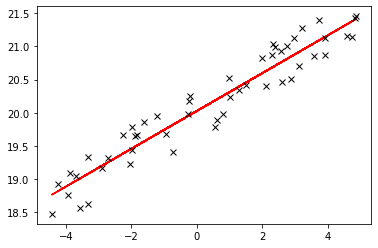

In [11]:
from matplotlib import pyplot

# obtain the points of the line according to the estimated parameters a and b
Y = line(X, a, b)

# plot the optimized line
pyplot.plot(X, Y, "r-")

# plot the data points
pyplot.plot(X, T, "kx")

## Task 4: Non-linear Data

Create target values that do not follow a line, for example:

$$t_n = \sin(x_n)$$

Compute the line parameters and plot the data and the estimated line into one plot.

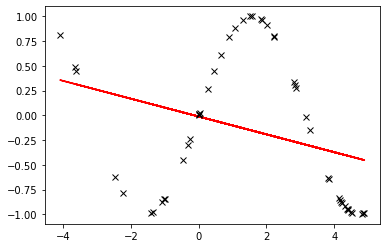

In [5]:
T = torch.sin(X)
a, b = regression(X, T)

# plot the line
Y = line(X, a, b)
pyplot.plot(X, Y, "r-")

# plot the points
pyplot.plot(X, T, "kx")
